In [5]:
import tensorflow as tf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from alibi.datasets import load_cats
from alibi.explainers import AnchorImage

In [6]:
import fastai
from fastai.vision.all import *
import pandas as pd

In [7]:
from PIL import Image
import PIL

In [8]:
import torchvision.transforms as T

In [9]:
path2img = 'C:/Users/jwst2/Python/tesis/jpg/general desa sentinel ES/3201140006.jpg'

In [71]:
datapath = "C:/Users/jwst2/Python/tesis/jpg/UR/10. Sentinel 10M Desa ES/"
modelpath = "C:/Users/jwst2/Python/tesis/models/18042022 D010.pkl"
imagepath = "C:/Users/jwst2/Python/tesis/jpg/general desa sentinel ES/"
imagepath2 = "C:/Users/jwst2/Python/tesis/jpg/general desa sentinel 10m tc/"


In [11]:
img = PILImage.create(path2img)

In [12]:
image_shape = (224, 224, 3)
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)
print(f'Images shape: {data.shape}')

Images shape: (4, 224, 224, 3)


In [13]:
model = load_learner(modelpath)

In [14]:
def predict_fn(x):
    z = x[0].astype(np.uint8)
    z = PILImage.create(z)
    output = model.predict(z)[2].numpy()
    for i in range(1,x.shape[0]):
        y = x[i].astype(np.uint8)
        y = PILImage.create(y)
        output = np.append(output,model.predict(y)[2].numpy(),axis= 0)
    return output.reshape(-1, 2)

In [15]:
img_pil = np.expand_dims(img_pil, axis=0)

NameError: name 'img_pil' is not defined

In [ ]:
img_pil.shape

In [ ]:
path2img = imagepath +'3201020018.jpg'

In [63]:
img_pil = Image.open(path2img)
img_pil = np.asarray(img_pil)

In [72]:
path2img2 = imagepath2 +'3201020018.jpg'
img_pil2 = Image.open(path2img2)
img_pil2 = np.asarray(img_pil2)

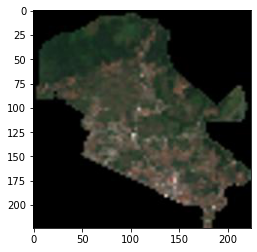

In [73]:
plt.imshow(img_pil2);

In [64]:
model.predict(PILImage.create(path2img))

('urban', tensor(1), tensor([0.0068, 0.9932]))

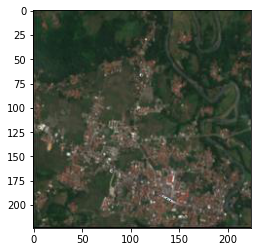

In [65]:
plt.imshow(img_pil);

In [66]:
image_shape = (224, 224,3)
segmentation_fn = 'slic'
kwargs = {'n_segments': 5, 'compactness': 20, 'sigma': .5}
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

In [ ]:
explanation = explainer.explain(img_pil, threshold=.80, p_sample=1)

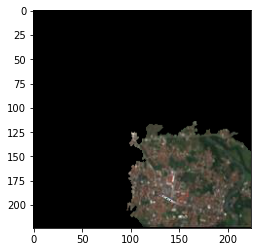

In [189]:
plt.imshow(explanation.anchor);

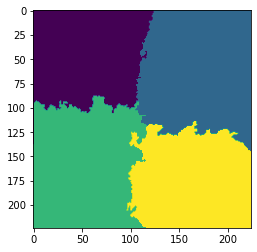

In [190]:
plt.imshow(explanation.segments);

### Rural

In [254]:
image_shape = (224, 224,3)
segmentation_fn = 'slic'
kwargs = {'n_segments': 4, 'compactness': 20, 'sigma': .5}
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

In [310]:
path2imgr = imagepath +'3203090003.jpg'
img_pilr = Image.open(path2imgr)
img_pilr = np.asarray(img_pilr)

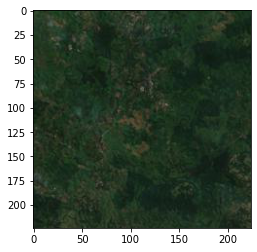

In [311]:
plt.imshow(img_pilr);

In [312]:
model.predict(PILImage.create(path2imgr))

('rural', tensor(0), tensor([0.5338, 0.4662]))

In [298]:
path2imgr = imagepath +'3205010010.jpg'
img_pilr = Image.open(path2imgr)
img_pilr = np.asarray(img_pilr)

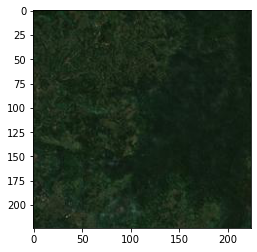

In [299]:
plt.imshow(img_pilr);

In [300]:
model.predict(PILImage.create(path2imgr))

('rural', tensor(0), tensor([0.8055, 0.1945]))

In [339]:
path2imgr = imagepath +'3202110014.jpg'
img_pilr = Image.open(path2imgr)
img_pilr = np.asarray(img_pilr)

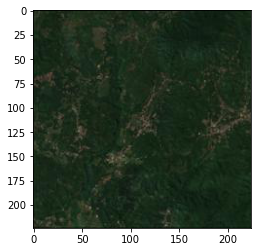

In [340]:
plt.imshow(img_pilr);

In [341]:
model.predict(PILImage.create(path2imgr))

('urban', tensor(1), tensor([0.3386, 0.6614]))

In [338]:
path2imgr = imagepath +'3203051008.jpg'
img_pilr = Image.open(path2imgr)
img_pilr = np.asarray(img_pilr)

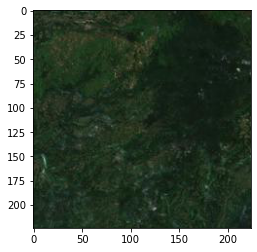

In [320]:
plt.imshow(img_pilr);

In [321]:
model.predict(PILImage.create(path2imgr))

('rural', tensor(0), tensor([0.7408, 0.2592]))

In [ ]:
explanationr = explainer.explain(img_pilr, threshold=.95, p_sample=1)

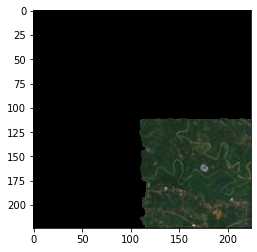

In [292]:
plt.imshow(explanationr.anchor);

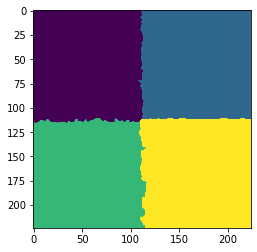

In [293]:
plt.imshow(explanationr.segments);

### MOST Confused

In [119]:
from alibi.confidence import TrustScore

In [17]:
path = Path.cwd() / (datapath)
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1, seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label,item_tfms = Resize(224)) # data augmentation (mult multiplies the default transformation values)
dls = blocks.dataloaders(path,bs=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [975]:
model.dls.train = dls.train
model.dls.valid = dls.valid

In [ ]:
interp = ClassificationInterpretation.from_learner(model)

In [ ]:
interp.plot_top_losses(16)